## <b> Evaluation Project 8 Customer Churn Analysis </b>
<b><em> By: Mr.Lokesh Baviskar </em></b>

<b><em> Batch: 1833 </em></b>

## <b>PROBLEM STATEMENT:</b>

<b><em>Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
        
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. </em></b>

#### You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

<b>Note: You can find the dataset in the link below.

Downlaod Files:</b>
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Customer Churn Analysis dataset Csv file using pandas

In [4]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [5]:
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows: 7043
No. of Columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# As we have 31 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

#### Comment :
- We have 7043 Rows and 21 Columns in this Telecom Dataset.
- <b> We have target Variable 'Churn' with object datatype, leading this to classification problem.</b>
- <b> There is interesting entry here under object datatype which is 'TotalCharges'. <u>This feature is numerical in nature but categories as Object datatypes.</u> This implies that there is presence of string variable in this column or might be data error.</b>
- 'SeniorCitizen' is categorical variable listed as Numerical variable. So we gone convert it into object datatype.
- At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our  analytical & modelling viewpoint.<b> We will drop 'CustomerID' column.</b>

   
#### We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.

In [7]:
df.drop(['customerID'],axis=1,inplace=True)

df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [8]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

# Statistical Analysis

<b> Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [9]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

22

<b> We can see that 22 duplicate entry in dataset. Let drop duplicated entry from dataset. </b>

In [10]:
df.drop_duplicates(keep='last',inplace= True)

In [11]:
df.shape

(7021, 20)

#### Now check for any whitespaces, NA,'-' in dataset. We might find something in TotalCharges column by considering Object datatype .

In [12]:
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b> There is possibility of whitespaces in TotalCharges column. lets deal with it.</b>

In [13]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [14]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [15]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

<b> We have remove whitespaces so let now check for missing values</b>

In [16]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
Churn                          0        0.000000
SeniorCitizen                  0        0.000000
Partner                        0        0.000000
Dependents                     0        0.000000
tenure                         0        0.000000
PhoneService                   0        0.000000
MultipleLines                  0        0.000000
InternetService                0        0.000000
OnlineSecurity                 0        0.000000
OnlineBackup                   0        0.000000
DeviceProtection               0        0.000000
TechSupport                    0        0.000000
StreamingTV                    0        0.000000
StreamingMovies                0        0.000000
Contract                       0        0.000000
PaperlessBilling               0        0.000000
PaymentMethod                  0        0.000000
MonthlyCharges                 0        0.000000
gender              

#### We can impute missing value in TotalCharges either with mean and median. We can decide imputation method after checking distribution and Outliers in data

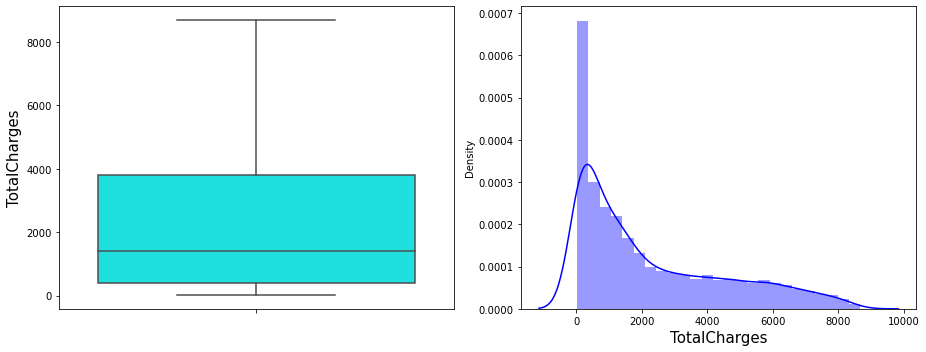

In [17]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [18]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.353388017122
Median of TotalCharges: 1403.875


#### Observation:
- We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
- Distribution plot shows that Total Charges feature is right skewed.
- Mean is greater than Median.

<b> Considering above observation we can impute Missing value with Mean.</b>

#### Imputation of Missing value in TotalCharges with Mean

In [19]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

#### Checking for Null values after Imputation

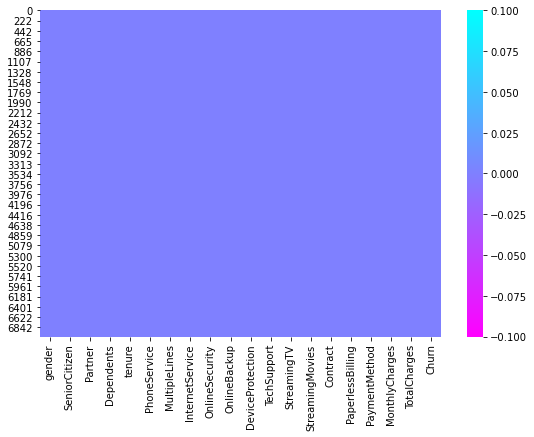

In [20]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Comment :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

### Statistical Matrix

In [20]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [21]:
df[Categorical].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


#### The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.
#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [22]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

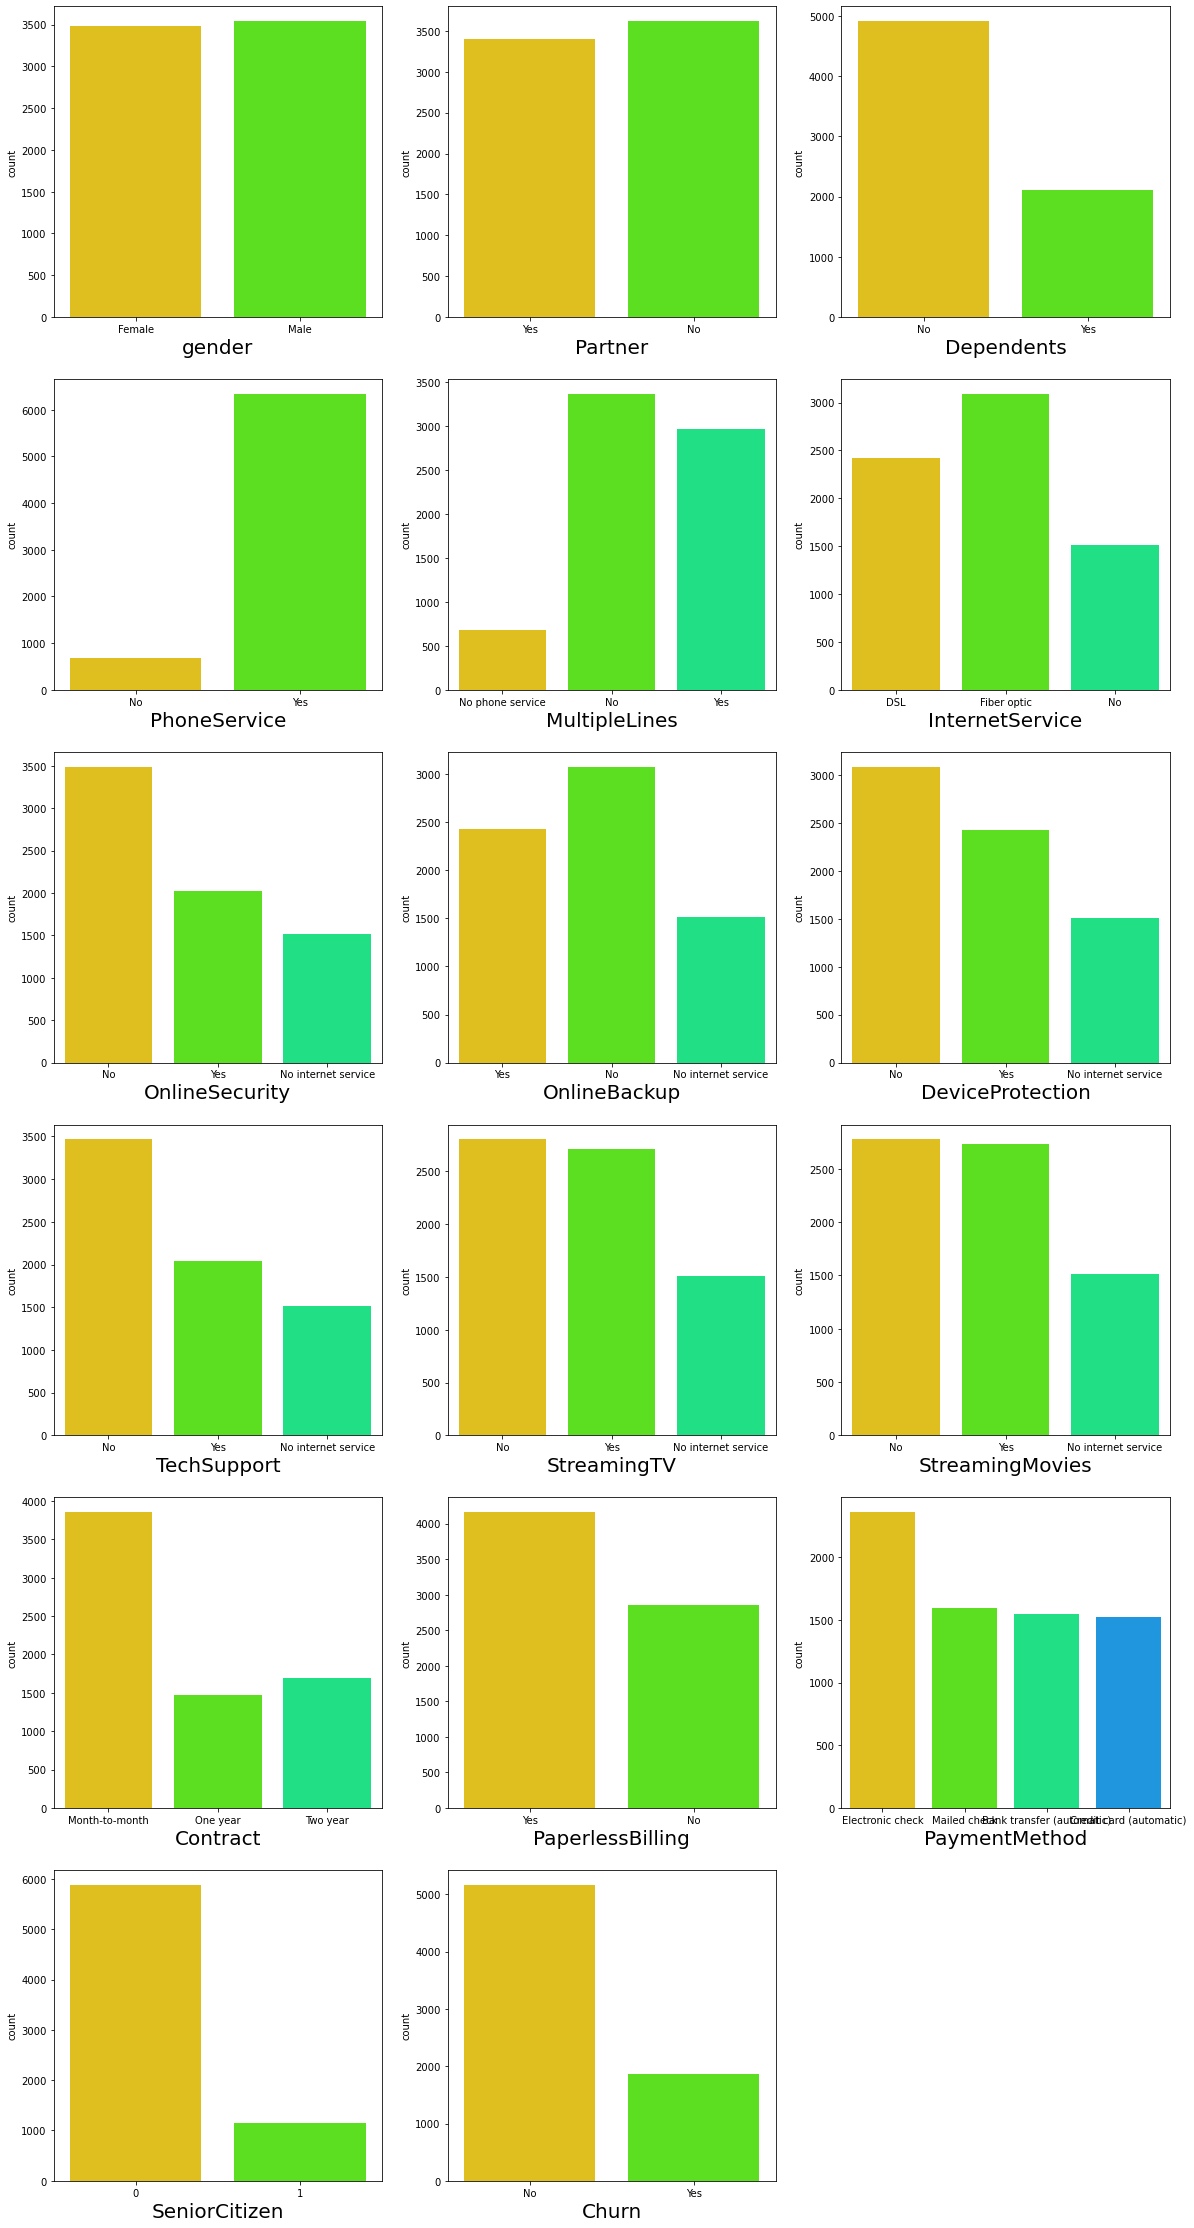

In [28]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<b> Now Start exploreing feature one by one, begin with Target Feature </b>

## Target Variable Churn

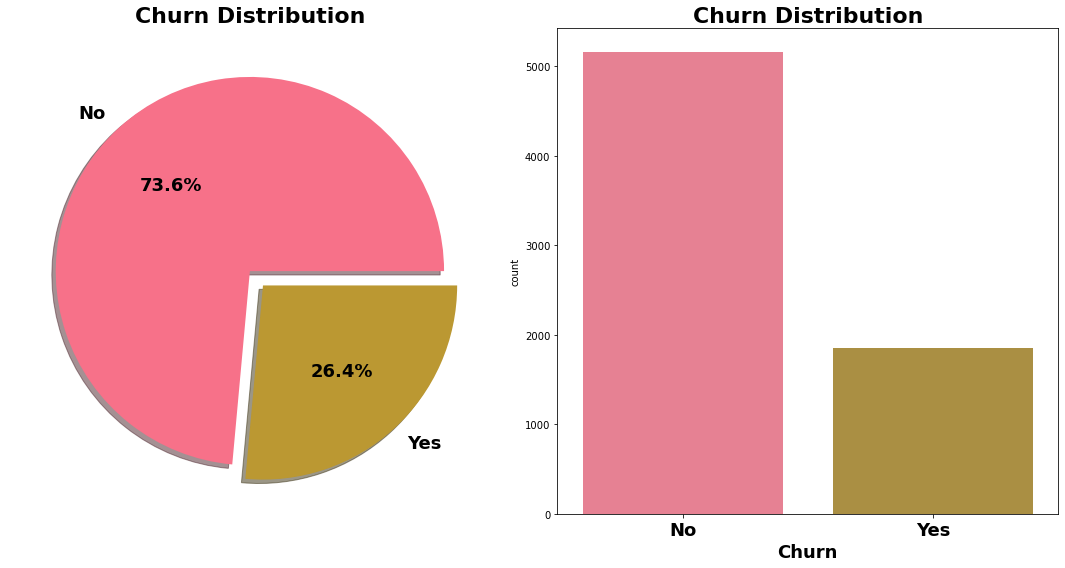

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Comment :
- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

<b> Let start exploration of Independent feature to figure where customer are unstatisfied and what are customers need or inclination in cutting edge competition.</b> 

### Gender vs Churn : Can there exist any trend between gender & churn or any impact of gender on Churn?

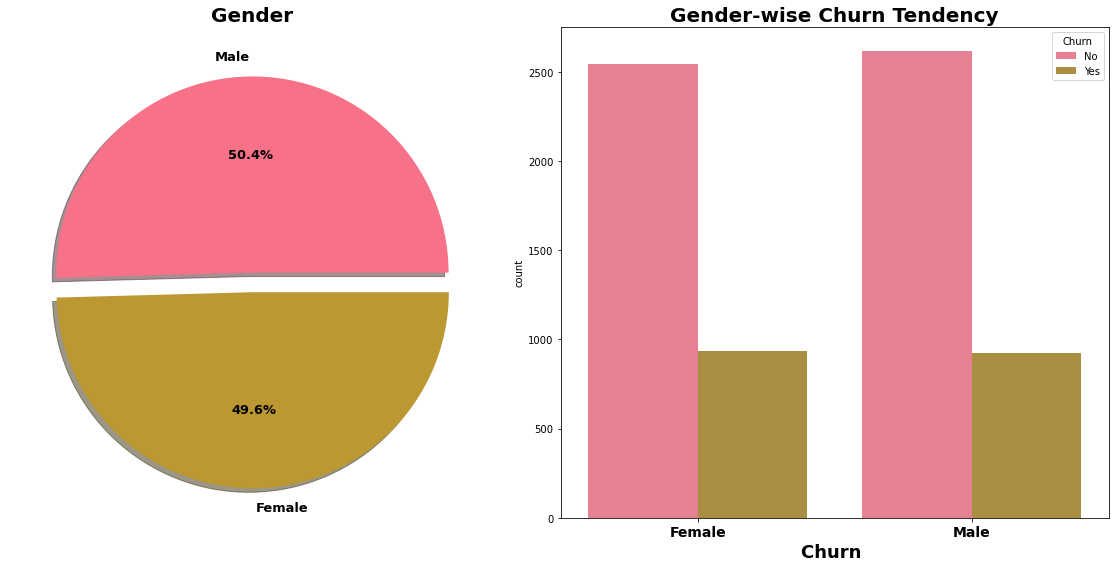

In [47]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [36]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


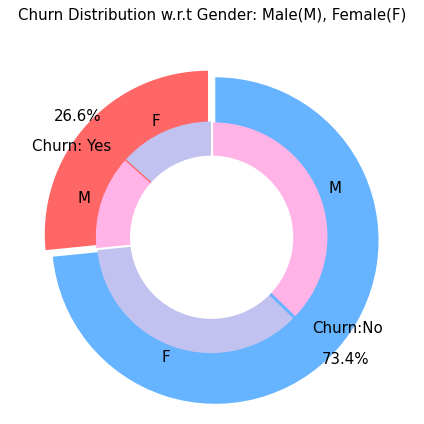

In [44]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Comment :
- Data contain both gender almost in same proportion with minor difference.
- Both gender have tendency of attrition in same percentage.

### Next Investigate Senior Citizen vs Gender Wise Churn Tendency

<b>Lets see how many of them are Senior Citizen and Churn tendency in senior citizen </b>

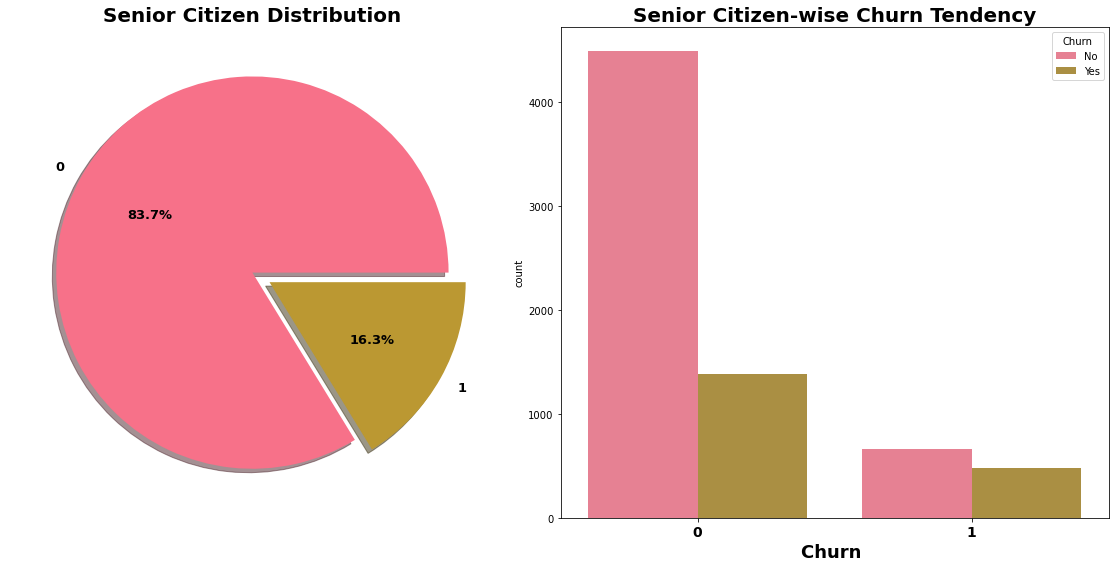

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

 <b>There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.</b>

In [39]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

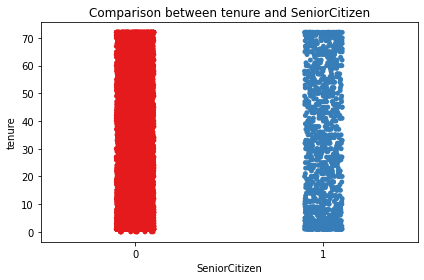

In [27]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

**Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.**

**There is no significant relation between Senior Citizen and Tenure.**

### Effect of Partner and Dependents on Churn

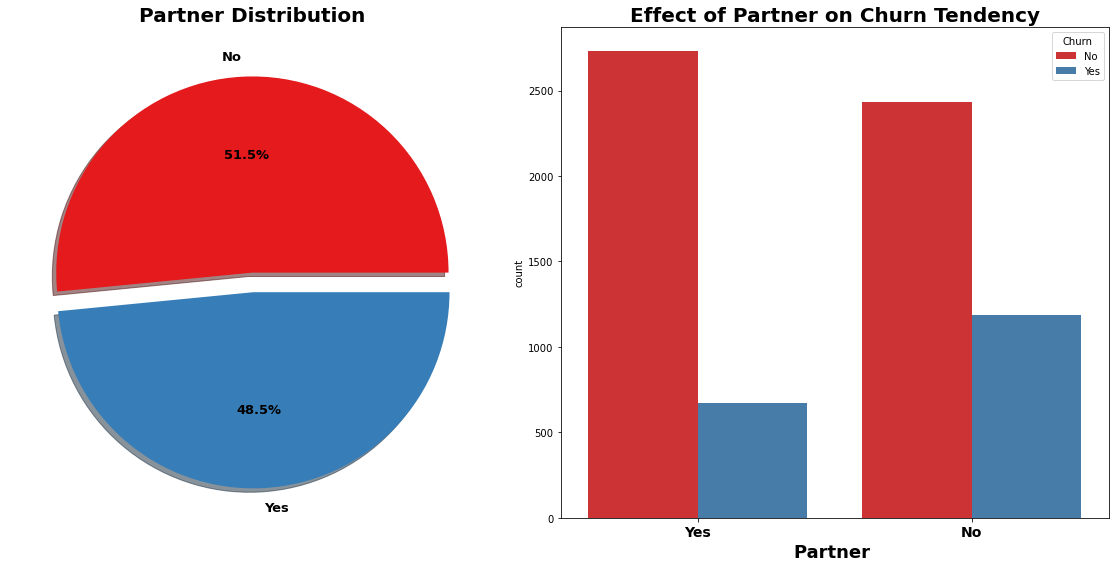

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

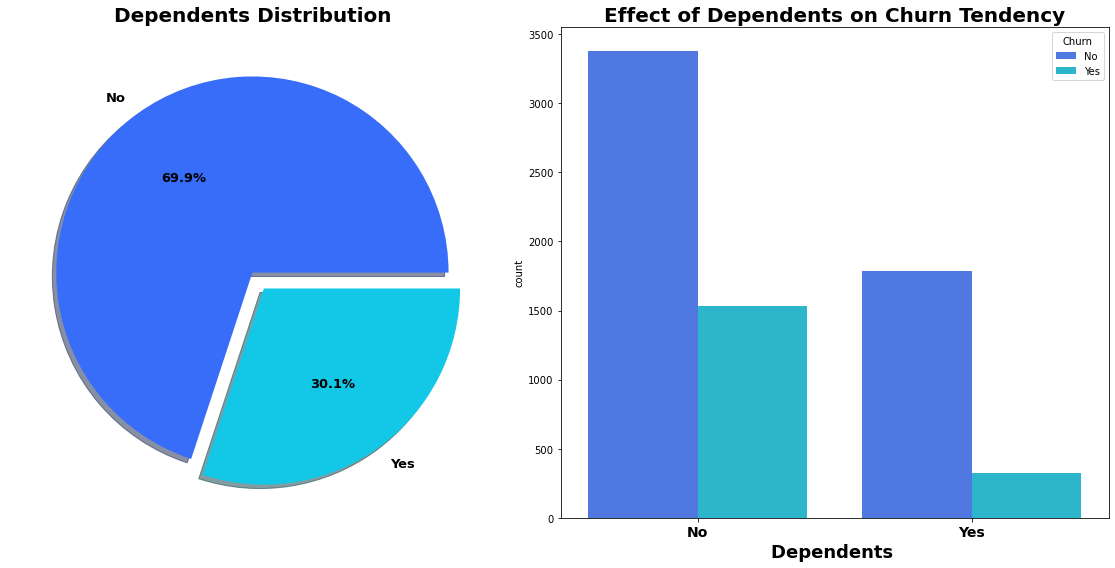

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation-
- **Customer having Partner have less tendency to Churn.**
- **Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%**

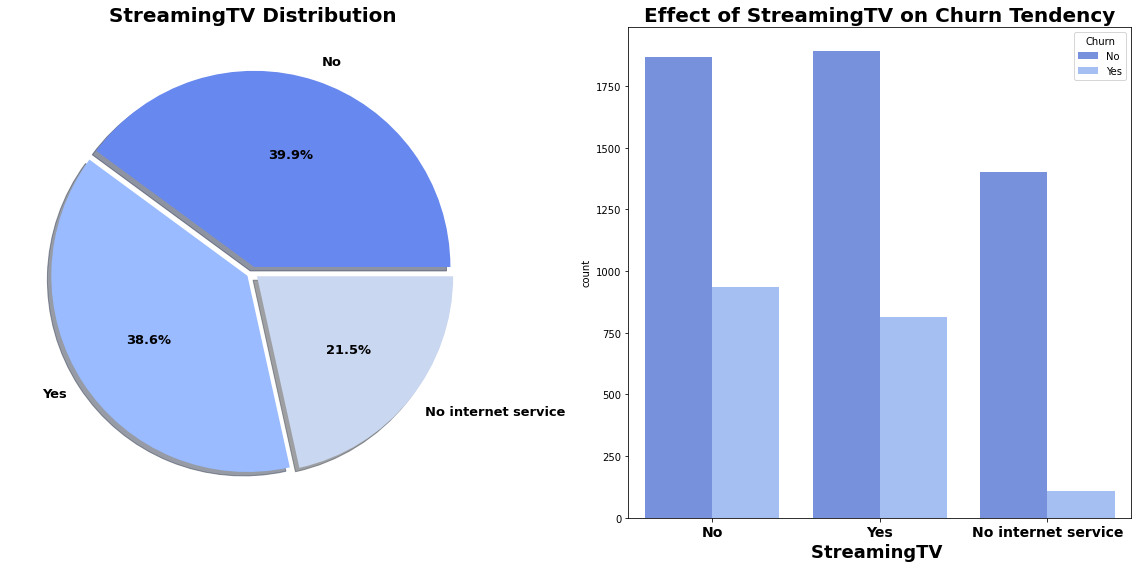

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

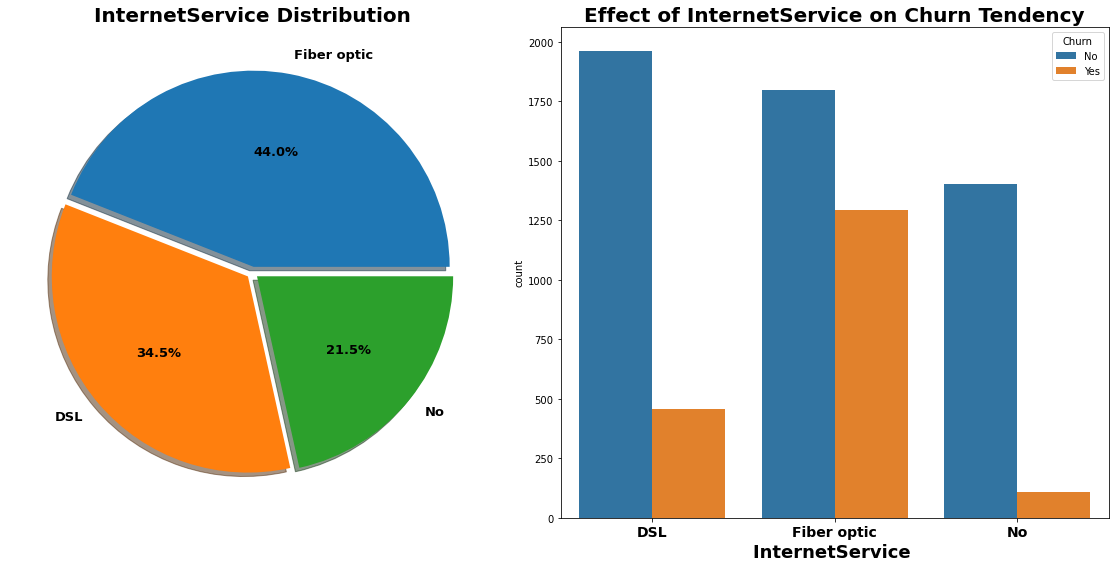

In [52]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

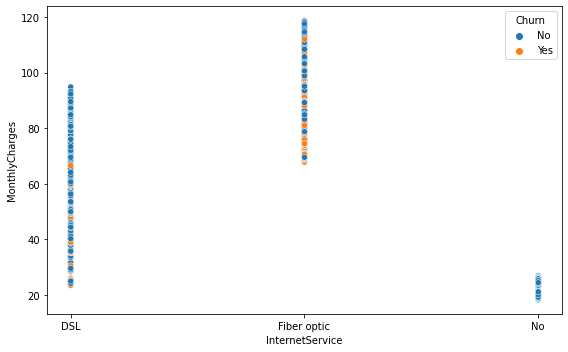

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.**

**We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.**

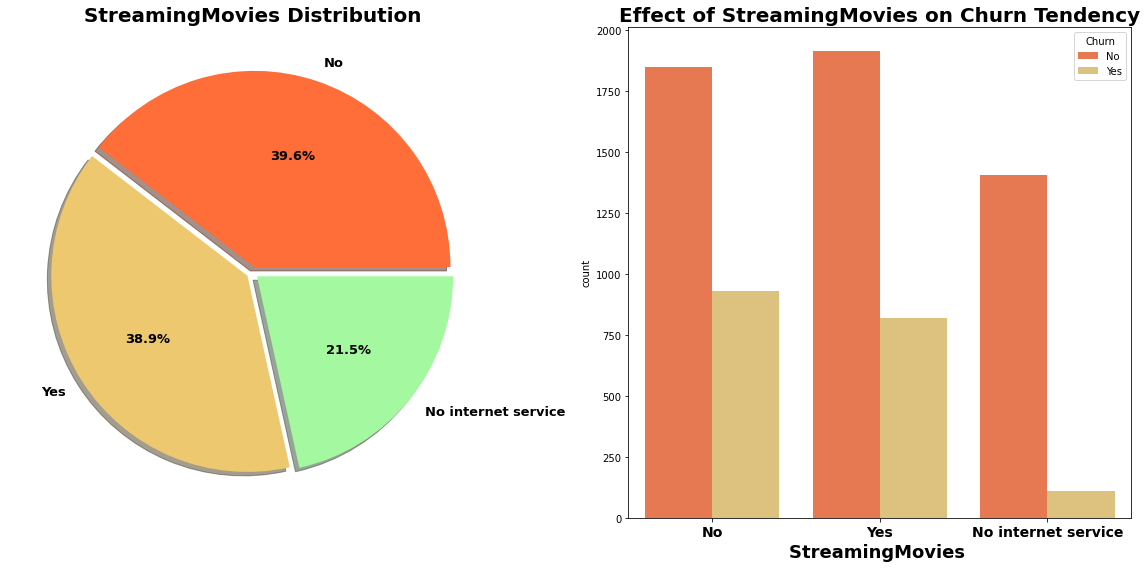

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**Almost same churn tendency in people streaming movies and not.**

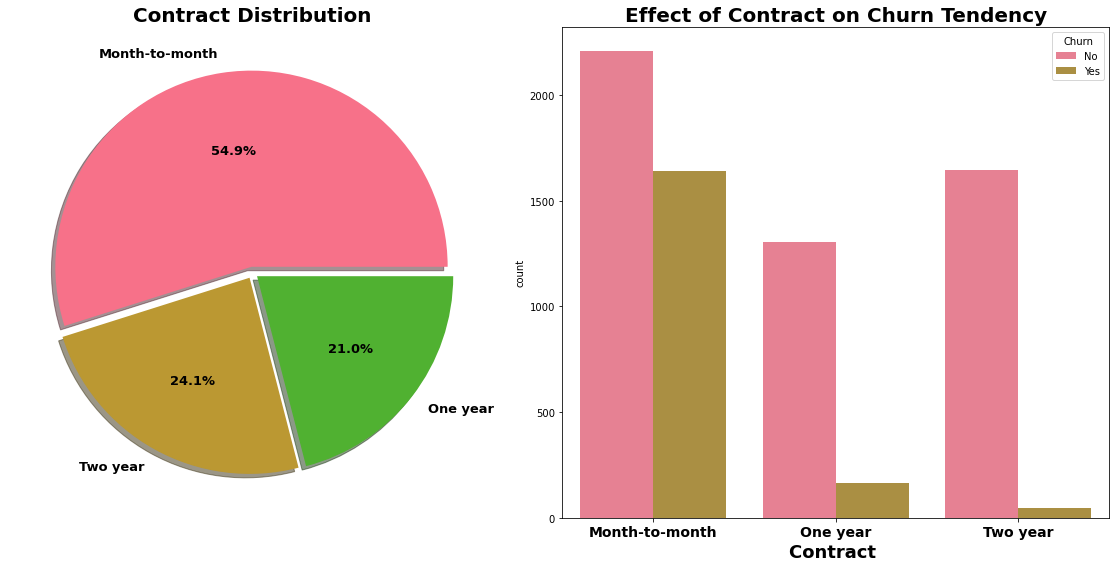

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

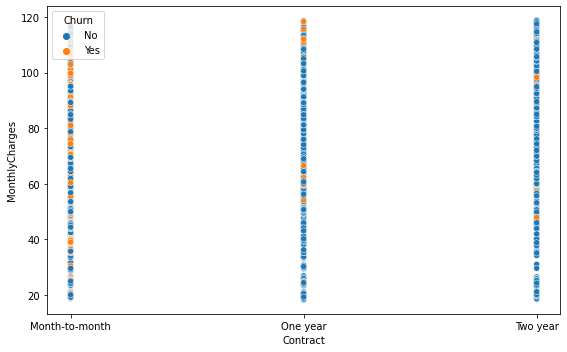

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.**

**We did not find any relation between Monthly charges and contract tenure.**

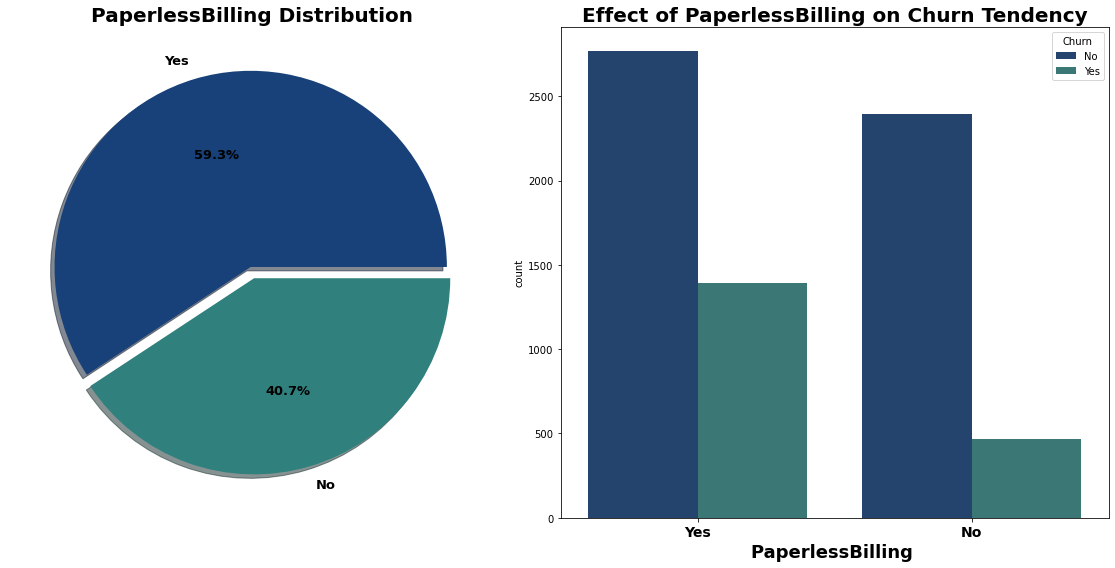

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**60% Customer perfer paperless billing.**

**The customers who prefer paperless billing they have high churn rate.**

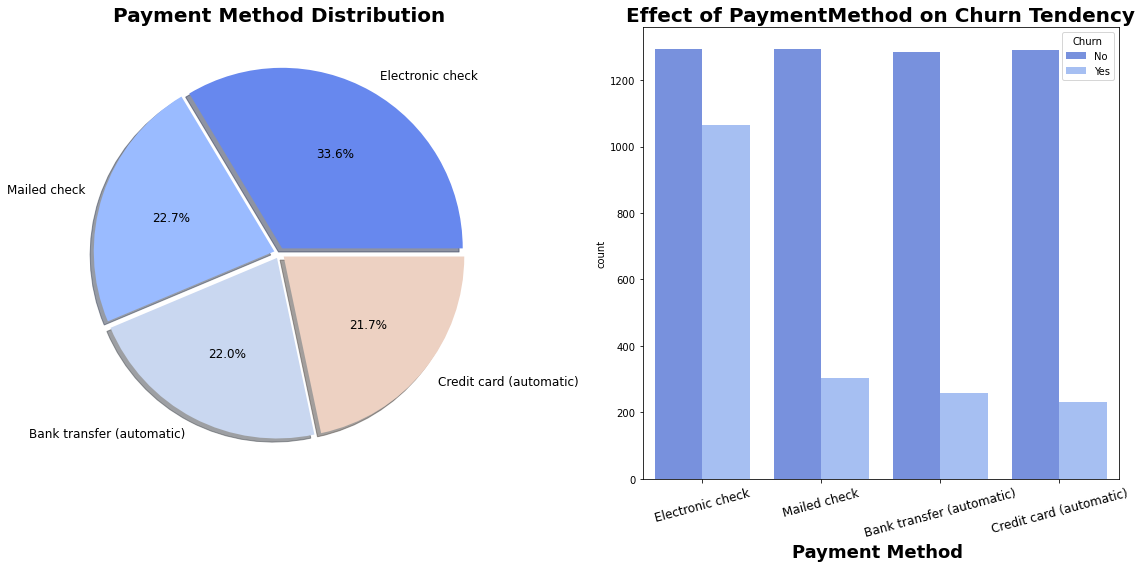

In [48]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

**We can see high Attrition tendency in customer who pay by Electronic check.**

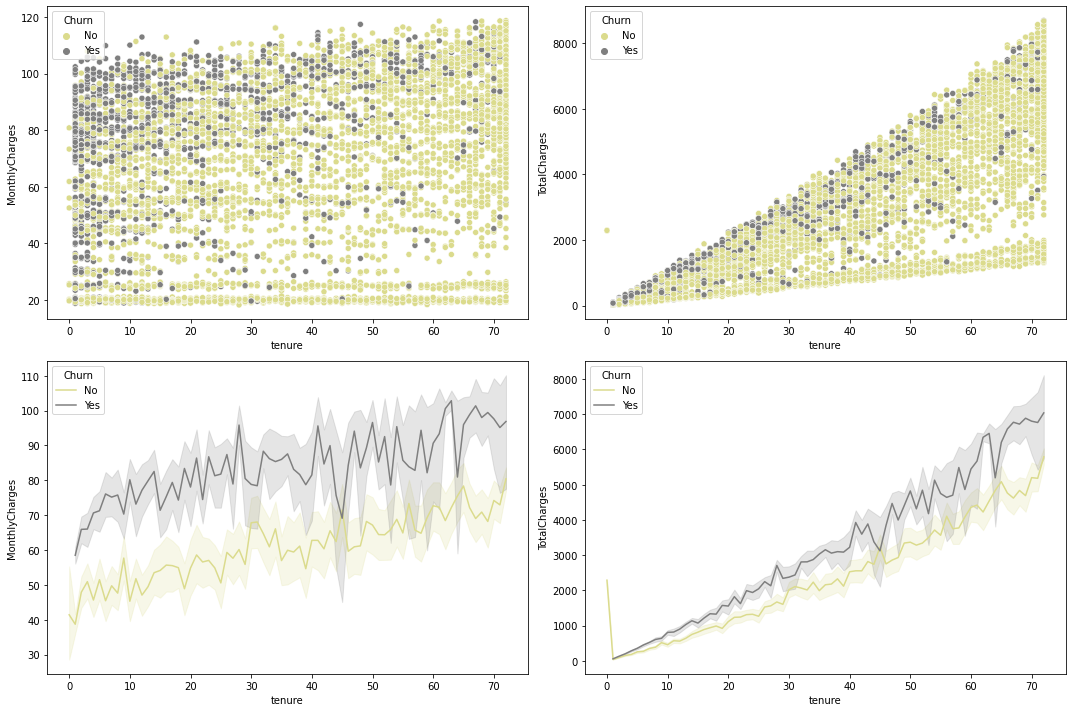

In [51]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

#### Observation:
- **High Monthly Charges in customer who choose churn compare to rest.**
- **Same goes with High Total Charges in customer who choose churn compare to rest.**

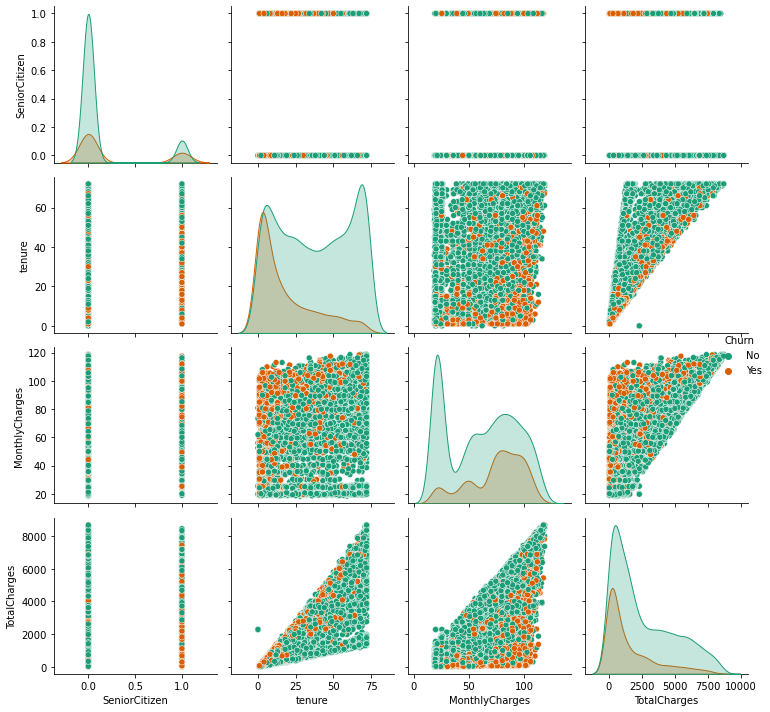

In [50]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Encoding categorical data

In [20]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [16]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [17]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Feature selection and Engineering

## 1. Outliers Detection and Removal

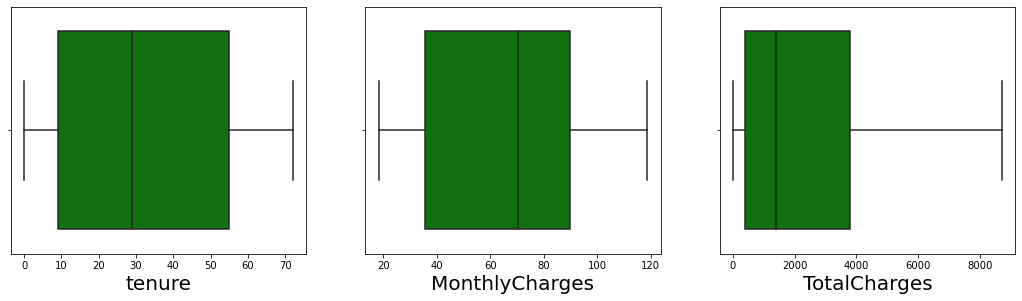

In [27]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see No outliers exist dataset.</b>

### Outliers removal using Zscore method

In [18]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7021, 20)
Shape of the dataframe after removing outliers:  (6339, 20)
Percentage of data loss post outlier removal:  9.713715994872524


In [19]:
df.drop(['PhoneService'],axis=1,inplace=True)

## 2. Skewness of features

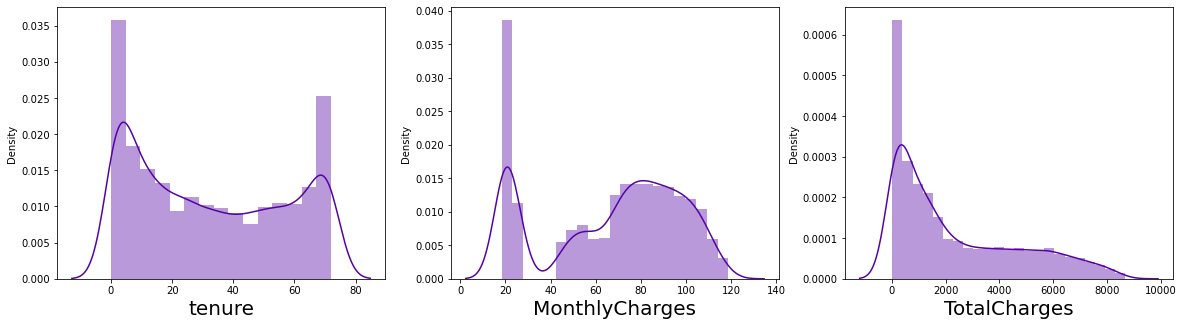

In [31]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data.**

**There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

In [20]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

**'tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.** 

**Out of which TotalCharges is skewed in nature. Which we gone transform here.**

In [21]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

## 3. Corrleation 

In [175]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005846,-0.002207,0.015722,0.001891,-0.006391,0.000983,-0.016826,-0.009353,-0.003121,-0.009769,-0.005624,-0.002760,0.000674,-0.018131,0.021961,-0.011639,-0.006783,-0.011391
SeniorCitizen,-0.005846,1.000000,0.013943,-0.213486,0.017647,0.152954,-0.039479,-0.123668,-0.020710,-0.023590,-0.144694,0.028453,0.047062,-0.141107,0.155193,-0.041891,0.238426,0.111597,0.149599
Partner,-0.002207,0.013943,1.000000,0.453409,0.382932,0.147545,-0.004099,0.151348,0.154738,0.167390,0.132266,0.133353,0.127676,0.297393,-0.010458,-0.147854,0.088571,0.337926,-0.153262
Dependents,0.015722,-0.213486,0.453409,1.000000,0.159194,-0.028535,0.053701,0.146427,0.090389,0.082944,0.130166,0.048859,0.023932,0.242286,-0.106970,-0.037411,-0.131791,0.084275,-0.158628
tenure,0.001891,0.017647,0.382932,0.159194,1.000000,0.358098,-0.034932,0.326356,0.377187,0.367678,0.324457,0.282710,0.292966,0.674586,0.002370,-0.361878,0.242184,0.827354,-0.348882
MultipleLines,-0.006391,0.152954,0.147545,-0.028535,0.358098,1.000000,-0.107675,0.006752,0.125043,0.130055,0.011287,0.187307,0.193380,0.114261,0.174017,-0.183244,0.454819,0.458583,0.042438
InternetService,0.000983,-0.039479,-0.004099,0.053701,-0.034932,-0.107675,1.000000,-0.027406,0.030417,0.049829,-0.022841,0.099513,0.094169,0.115528,-0.164085,0.096674,-0.470605,-0.260767,-0.058968
OnlineSecurity,-0.016826,-0.123668,0.151348,0.146427,0.326356,0.006752,-0.027406,1.000000,0.198167,0.173275,0.283252,0.046717,0.062345,0.367667,-0.154346,-0.089597,-0.071808,0.207795,-0.289182
OnlineBackup,-0.009353,-0.020710,0.154738,0.090389,0.377187,0.125043,0.030417,0.198167,1.000000,0.195604,0.210090,0.151646,0.139587,0.286126,-0.019141,-0.126394,0.110079,0.310079,-0.201206
DeviceProtection,-0.003121,-0.023590,0.167390,0.082944,0.367678,0.130055,0.049829,0.173275,0.195604,1.000000,0.241956,0.278088,0.284397,0.342751,-0.040732,-0.132907,0.154859,0.318027,-0.176171


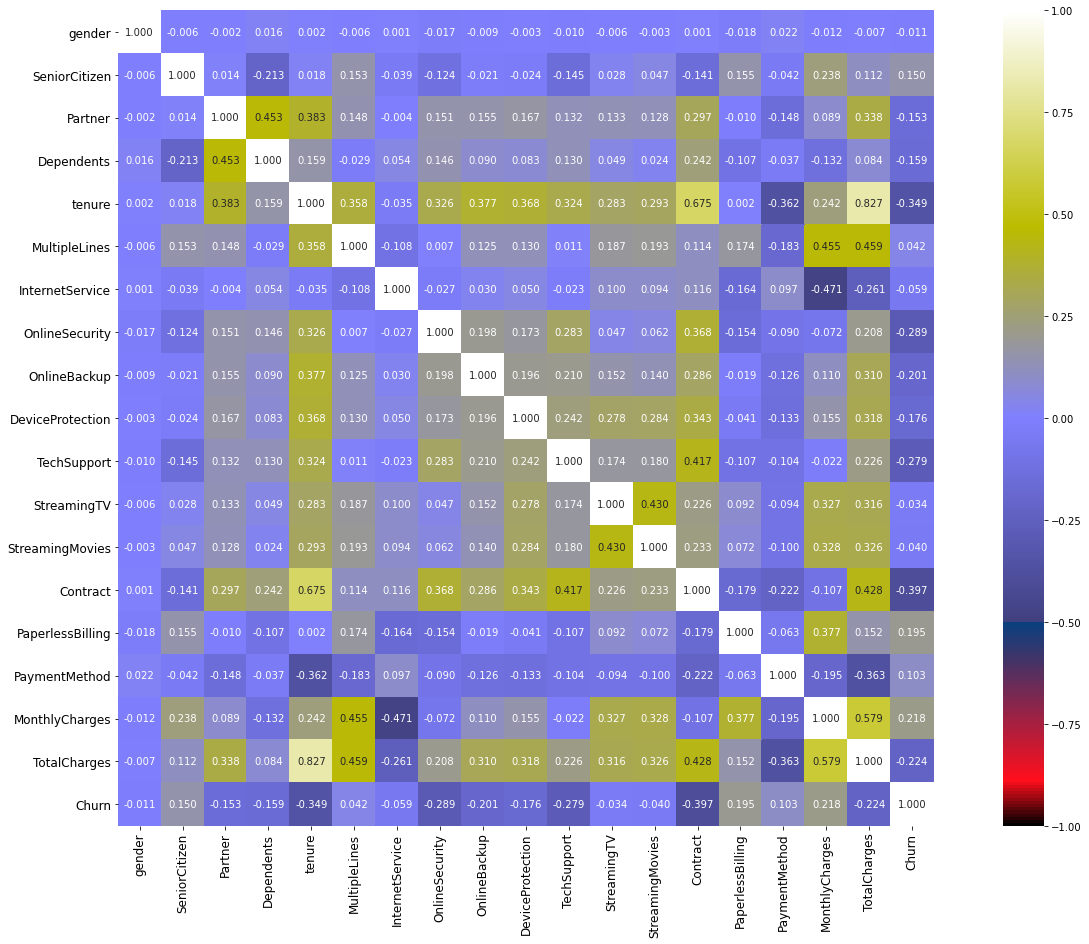

In [176]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

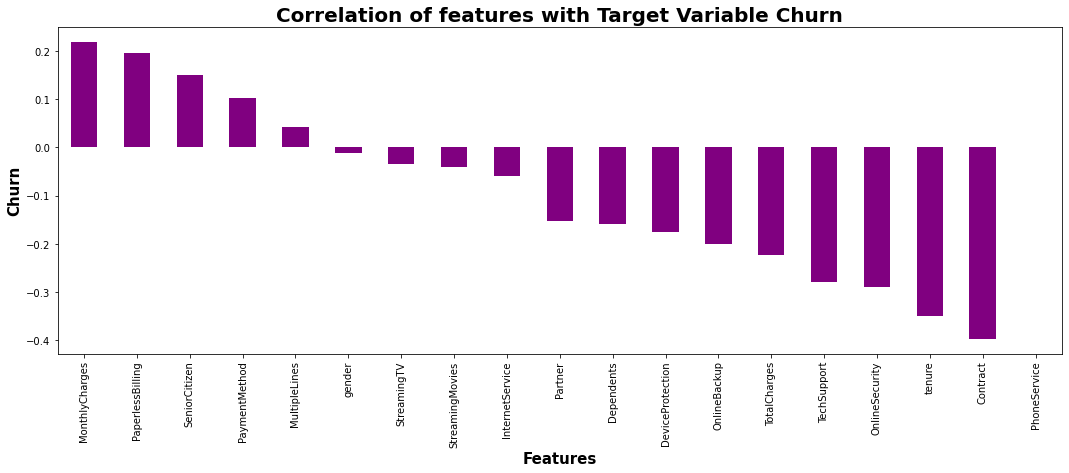

In [119]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

## 4. Balanceing Imbalanced target feature

In [22]:
df.Churn.value_counts()

0    4652
1    1687
Name: Churn, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [25]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [26]:
Y.value_counts()

1    4652
0    4652
Name: Churn, dtype: int64

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

 ## 5. Checking Multicollinearity between features using variance_inflation_factor

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.015243,gender
1,1.093411,SeniorCitizen
2,1.535972,Partner
3,1.426412,Dependents
4,6.520992,tenure
5,1.424486,MultipleLines
6,1.480646,InternetService
7,1.336460,OnlineSecurity
8,1.245246,OnlineBackup
9,1.307033,DeviceProtection


**Independent feature VIF is within permissible limit of 10**

## PCA

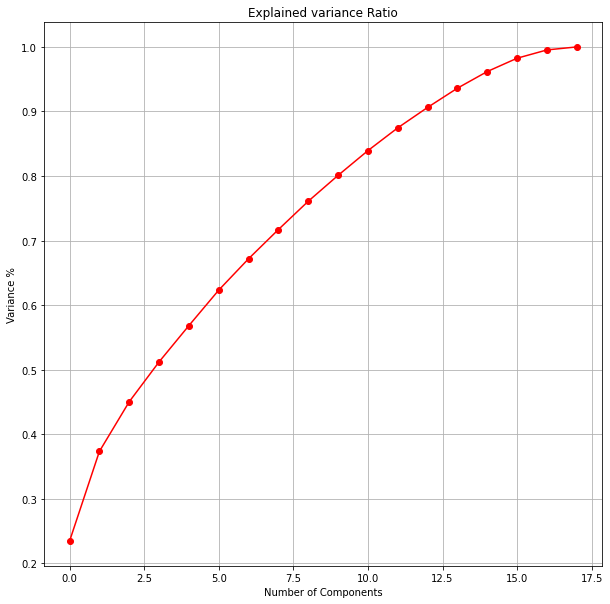

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 13 principal components attribute for 90% of variation in the data.  We shall pick the first 13 components for our prediction. </b>

In [30]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [31]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

# Machine Learning Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6512, 13)
Training target vector size: (6512,)
Test feature matrix size: (2792, 13)
Test target vector size: (2792,)


### Finding best Random state

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8126790830945558 on Random_state 90


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8126790830945558


Confusion matrix of Logistics Regression : 
 [[1081  334]
 [ 189 1188]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      1415
           1       0.78      0.86      0.82      1377

    accuracy                           0.81      2792
   macro avg       0.82      0.81      0.81      2792
weighted avg       0.82      0.81      0.81      2792



### Finding Optimal value of n_neighbors for KNN

In [38]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4784017086533104
RMSE value for k=  2 is: 0.5071127328141495
RMSE value for k=  3 is: 0.46626910340578104
RMSE value for k=  4 is: 0.4658848683974606
RMSE value for k=  5 is: 0.4589136293440278
RMSE value for k=  6 is: 0.45420669846267875
RMSE value for k=  7 is: 0.4514383253608233
RMSE value for k=  8 is: 0.4549945684363609
RMSE value for k=  9 is: 0.45381225053898117
RMSE value for k=  10 is: 0.45381225053898117
RMSE value for k=  11 is: 0.44745379617728914
RMSE value for k=  12 is: 0.44665262490580254
RMSE value for k=  13 is: 0.44745379617728914
RMSE value for k=  14 is: 0.4442404418786892
RMSE value for k=  15 is: 0.4442404418786892
RMSE value for k=  16 is: 0.44464338113783364
RMSE value for k=  17 is: 0.44262501674004606
RMSE value for k=  18 is: 0.44059740636840716
RMSE value for k=  19 is: 0.4470533900155051
RMSE value for k=  20 is: 0.44544816619659383


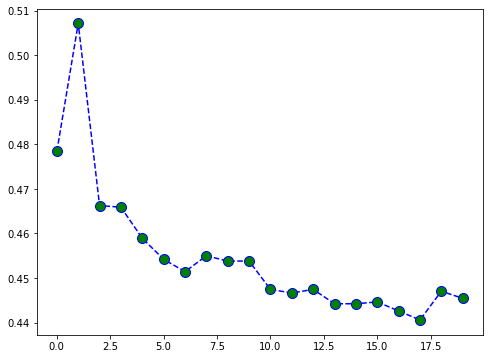

In [39]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

#### Comment- 
At k=18, we get the minimum RMSE value which approximately 0.44059740636840716, and shoots up on further increasing the k value. We can safely say that k=18 will give us the best result in this case


## Applying other classification algorithm

In [40]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8126790830945558


Confusion matrix : 
 [[1081  334]
 [ 189 1188]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      1415
           1       0.78      0.86      0.82      1377

    accuracy                           0.81      2792
   macro avg       0.82      0.81      0.81      2792
weighted avg       0.82      0.81      0.81      2792



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8287965616045845


Confusion matrix : 
 [[1108  307]
 [ 171 1206]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1415
           1       0.80      0.88      0.83      1377

    accuracy                           0.83      2792
   macro avg       0.83      0.83      0.83      2792
weighted avg       0.83      0.83      0

# CrossValidation :

In [41]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.75067168 0.73723804 0.79742074 0.80225685 0.81129032]
Mean Score : 0.7797755282453069
Std deviation : 0.029887847453738407




Cross Validation Score SVC() :

Score : [0.74476088 0.75335841 0.82213864 0.83557227 0.82365591]
Mean Score : 0.795897222559267
Std deviation : 0.038620570508079786




Cross Validation Score GaussianNB() :

Score : [0.70983342 0.71037077 0.80816765 0.80816765 0.81075269]
Mean Score : 0.769458436613452
Std deviation : 0.04847373863928888




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68565287 0.71950564 0.78452445 0.77968834 0.78548387]
Mean Score : 0.7509710353434678
Std deviation : 0.040983372327671755




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.75335841 0.75819452 0.80440623 0.81246642 0.81827957]
Mean Score : 0.78934102950778
Std deviation : 0.027799413792218133




Cross Validation Score RandomForestClassifier() :

Score : [0.72219237 0.73831274

# Hyper Parameter Tuning : GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [44]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.790 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.802 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.778 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.790 total time=   0.0s
[CV 5

[CV 5/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.786 total time=   0.0s
[CV 1/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 2/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.804 total time=   0.0s
[CV 3/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.785 total time=   0.0s
[CV 4/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth

[CV 5/5; 15/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.807 total time=   0.0s
[CV 1/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 1/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.807 total time=   0.0s
[CV 2/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 2/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.826 total time=   0.0s
[CV 3/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 3/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.803 total time=   0.0s
[CV 4/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 16/168] END bootstrap=True, criterio

[CV 1/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.818 total time=   0.0s
[CV 2/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 2/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 3/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 3/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.809 total time=   0.0s
[CV 4/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 5/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 23/168] END bootstrap=True, criteri

[CV 2/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.835 total time=   0.0s
[CV 3/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 3/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.800 total time=   0.0s
[CV 4/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 4/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.825 total time=   0.0s
[CV 5/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 5/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.824 total time=   0.0s
[CV 1/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 1/5; 31/168] END bootstrap=True, criteri

[CV 2/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 3/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 3/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.798 total time=   0.0s
[CV 4/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 4/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.836 total time=   0.0s
[CV 5/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 38/168] END bootstrap=True, criteri

[CV 3/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.815 total time=   0.0s
[CV 4/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 4/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.823 total time=   0.0s
[CV 5/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.825 total time=   0.0s
[CV 1/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.822 total time=   0.1s
[CV 2/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 2/5; 45/168] END bootstrap=True, criteri

[CV 4/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.824 total time=   0.0s
[CV 5/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 5/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.822 total time=   0.0s
[CV 1/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 1/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.817 total time=   0.0s
[CV 2/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 2/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.835 total time=   0.0s
[CV 3/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 3/5; 52/168] END bootstrap=True, criteri

[CV 5/5; 58/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10;, score=0.811 total time=   0.1s
[CV 1/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 1/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.817 total time=   0.2s
[CV 2/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 2/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.846 total time=   0.0s
[CV 3/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 3/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.816 total time=   0.0s
[CV 4/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 4/5; 59/168] END bootstrap=True, criteri

[CV 1/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.813 total time=   0.0s
[CV 2/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 2/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.827 total time=   0.0s
[CV 3/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 3/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.810 total time=   0.0s
[CV 4/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 4/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.835 total time=   0.1s
[CV 5/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 5/5; 66/168] END bootstrap=True, criteri

[CV 1/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.827 total time=   0.1s
[CV 2/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 2/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.830 total time=   0.1s
[CV 3/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 3/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.816 total time=   0.1s
[CV 4/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 4/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.836 total time=   0.0s
[CV 5/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 5/5; 73/168] END bootstrap=True, criteri

[CV 1/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.812 total time=   0.1s
[CV 2/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 2/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.836 total time=   0.1s
[CV 3/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 3/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.824 total time=   0.1s
[CV 4/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 4/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.827 total time=   0.0s
[CV 5/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 5/5; 80/168] END bootstrap=True, criteri

[CV 1/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.779 total time=   0.1s
[CV 2/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 2/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.797 total time=   0.0s
[CV 3/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 3/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.790 total time=   0.0s
[CV 4/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 4/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.796 total time=   0.0s
[CV 5/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 5/5; 87/168] END bootstr

[CV 1/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.784 total time=   0.0s
[CV 2/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 2/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.797 total time=   0.0s
[CV 3/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.787 total time=   0.0s
[CV 4/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 4/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.800 total time=   0.0s
[CV 5/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 5/5; 94/168] END bootstr

[CV 1/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.817 total time=   0.0s
[CV 2/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 2/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.836 total time=   0.0s
[CV 3/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 3/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.803 total time=   0.1s
[CV 4/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.825 total time=   0.1s
[CV 5/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 5/5; 101

[CV 1/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.814 total time=   0.0s
[CV 2/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 2/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.831 total time=   0.1s
[CV 3/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 3/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.806 total time=   0.1s
[CV 4/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 4/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.826 total time=   0.1s
[CV 5/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 5/5; 108

[CV 5/5; 114/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10;, score=0.823 total time=   0.0s
[CV 1/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 1/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.822 total time=   0.1s
[CV 2/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 2/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.839 total time=   0.1s
[CV 3/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 3/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.815 total time=   0.1s
[CV 4/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 4/5; 115

[CV 4/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.821 total time=   0.1s
[CV 5/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.819 total time=   0.1s
[CV 1/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.824 total time=   0.1s
[CV 2/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 2/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.833 total time=   0.2s
[CV 3/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 3/5; 122

[CV 4/5; 128/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10;, score=0.817 total time=   0.1s
[CV 5/5; 128/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 128/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10;, score=0.816 total time=   0.1s
[CV 1/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 129/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15;, score=0.817 total time=   0.2s
[CV 2/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 2/5; 129/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15;, score=0.837 total time=   0.2s
[CV 3/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 3/5; 129

[CV 3/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 4/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.822 total time=   0.0s
[CV 5/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 5/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.815 total time=   0.0s
[CV 1/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 1/5; 136/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.823 total time=   0.1s
[CV 2/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 2/5; 136

[CV 3/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5; 142/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 4/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.816 total time=   0.0s
[CV 5/5; 142/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 5/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.817 total time=   0.0s
[CV 1/5; 143/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15
[CV 1/5; 143/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15;, score=0.823 total time=   0.1s
[CV 2/5; 143/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15
[CV 2/5; 143

[CV 3/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.821 total time=   0.0s
[CV 4/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 4/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.823 total time=   0.0s
[CV 5/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 5/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.807 total time=   0.0s
[CV 1/5; 150/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 1/5; 150/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.817 total time=   0.1s
[CV 2/5; 150/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 2/5; 150

[CV 2/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.816 total time=   0.0s
[CV 3/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 3/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.820 total time=   0.0s
[CV 4/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 4/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.823 total time=   0.0s
[CV 5/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 5/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.814 total time=   0.0s
[CV 1/5; 157/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=15
[CV 1/5; 157

[CV 1/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.820 total time=   0.0s
[CV 2/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 2/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.834 total time=   0.0s
[CV 3/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 3/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.806 total time=   0.0s
[CV 4/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.828 total time=   0.1s
[CV 5/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 5/5; 163

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [45]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 60}

# Final Model

In [46]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8563753581661891


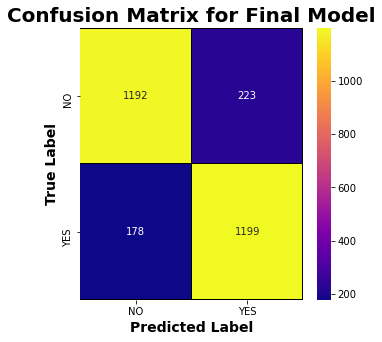

In [48]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

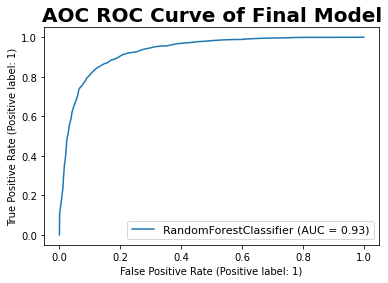

Auc Score :
 0.8565681527158698


In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [50]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']

## Predicting the Final Model

In [51]:
# Prediction
prediction = Final_mod.predict(X_test)

In [52]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
